<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#准备工作" data-toc-modified-id="准备工作-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#数据来源" data-toc-modified-id="数据来源-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据来源</a></span><ul class="toc-item"><li><span><a href="#慧科新闻数据库（2000-2022）" data-toc-modified-id="慧科新闻数据库（2000-2022）-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>慧科新闻数据库（2000-2022）</a></span></li><li><span><a href="#人民日报新闻数据（2018-2023）" data-toc-modified-id="人民日报新闻数据（2018-2023）-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>人民日报新闻数据（2018-2023）</a></span></li></ul></li><li><span><a href="#数据整合" data-toc-modified-id="数据整合-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据整合</a></span><ul class="toc-item"><li><span><a href="#test" data-toc-modified-id="test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>test</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#分词" data-toc-modified-id="分词-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>分词</a></span></li><li><span><a href="#词频统计" data-toc-modified-id="词频统计-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>词频统计</a></span></li><li><span><a href="#关键词提取" data-toc-modified-id="关键词提取-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>关键词提取</a></span></li><li><span><a href="#情感分析" data-toc-modified-id="情感分析-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>情感分析</a></span></li></ul></li><li><span><a href="#数据分析" data-toc-modified-id="数据分析-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>数据分析</a></span><ul class="toc-item"><li><span><a href="#EMV" data-toc-modified-id="EMV-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>EMV</a></span></li><li><span><a href="#CIMV回归" data-toc-modified-id="CIMV回归-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIMV回归</a></span><ul class="toc-item"><li><span><a href="#向量化" data-toc-modified-id="向量化-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>向量化</a></span></li><li><span><a href="#SVR论文方法设置参数" data-toc-modified-id="SVR论文方法设置参数-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SVR论文方法设置参数</a></span><ul class="toc-item"><li><span><a href="#确定C" data-toc-modified-id="确定C-5.2.2.1"><span class="toc-item-num">5.2.2.1&nbsp;&nbsp;</span>确定C</a></span></li><li><span><a href="#确定$\epsilon$" data-toc-modified-id="确定$\epsilon$-5.2.2.2"><span class="toc-item-num">5.2.2.2&nbsp;&nbsp;</span>确定$\epsilon$</a></span></li></ul></li><li><span><a href="#SVR结果" data-toc-modified-id="SVR结果-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>SVR结果</a></span><ul class="toc-item"><li><span><a href="#预测" data-toc-modified-id="预测-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>预测</a></span></li><li><span><a href="#结果汇总" data-toc-modified-id="结果汇总-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>结果汇总</a></span></li><li><span><a href="#指数对比" data-toc-modified-id="指数对比-5.2.3.3"><span class="toc-item-num">5.2.3.3&nbsp;&nbsp;</span>指数对比</a></span></li></ul></li><li><span><a href="#sklearn实现" data-toc-modified-id="sklearn实现-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>sklearn实现</a></span></li></ul></li></ul></li></ul></div>

In [2]:
!python -V 

Python 3.9.13


In [3]:
!pip install gensim

# 准备工作

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv 
import os 
import math

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [6]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.sentiment import SentimentIntensityAnalyzer

import jieba
import jieba.analyse
from collections import Counter

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.ensemble import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import matplotlib.pyplot as plt  
from tqdm import tqdm

In [9]:
economic_pattern = '经济|金融'
uncertainty_pattern = '风险|波动|方差|不确定'
market_pattern = '证券|市场|股市|股票|上证指数|深证指数|中小板|创业板|科创板'

# 数据来源

## 慧科新闻数据库（2000-2022）

In [49]:
def clean_text(text):
    cleaned_text = re.sub(r'\u3000|\n|-{3,}', ' ', text)
    text_cleaned = cleaned_text.strip()
    space_patten = re.compile(r'([\u4e00-\u9fa5])\s+([\u4e00-\u9fa5])')
    text_cleaned = space_patten.sub(r'\1\2', text_cleaned)
    text_cleaned = space_patten.sub(r'\1\2', text_cleaned)
    return text_cleaned

def extract_news_info(text):
    pattern = r'(\d+)\.\s+(.*?)\s+-\s+\((.*?)\)\s+(\d{4}-\d{2}-\d{2})\s+.*?-{4,}\s+(.*?)文章编号'  # 匹配新闻序号、新闻来源、新闻标题、日期和新闻正文
    matches = re.findall(pattern, text, re.DOTALL)

    news_info = []
    for match in matches:
        news_number = match[0]
        source = match[1].strip()
        title = match[2].strip()
        date = match[3]
        content = match[4].strip()
        
        content = clean_text(content)
        
        news_info.append([news_number, source, title, date, content])

    return news_info

In [50]:
def save_to_csv(news_info, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Number', 'Source', 'Title', 'Date', 'Content'])  # 写入表头
        writer.writerows(news_info)

In [7]:
# if __name__ == "__main__":
#     with open('2002-newstext-3.txt', 'r', encoding='utf-8') as file:
#         text = file.read()
#     news_info = extract_news_info(text)
#     save_to_csv(news_info, '2002-news-3.csv')

In [63]:
folder_path = 'huike-newsdata-4/'
huike_newsdata = []
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        news_info = extract_news_info(text)
        huike_newsdata.extend(news_info)
save_to_csv(huike_newsdata, 'huike_newsdata-4.csv')

In [10]:
start_id = 4
end_id = 4
id_list = [id for id in range(start_id, end_id + 1)]
data = pd.DataFrame()
for id in id_list:
    data_tmp = pd.read_csv(f"huike_newsdata-{id}.csv")
    data = pd.concat([data, data_tmp], axis = 0)
data = data.reset_index(drop = True)

In [11]:
data.shape

(9951, 5)

In [12]:
data['Source'].value_counts()

经济日报         3906
人民日报(数字报)    1765
中国经济时报       1734
光明日报(数字报)    1012
新华每日电讯        855
财新周刊          679
Name: Source, dtype: int64

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data.drop_duplicates(subset = 'Title', keep = 'first', inplace = True)  # 去除标题相同的新闻数据
data['text'] = data['Title'] + data['Content']  # 合并标题和正文
data = data[['Date', 'text']]
data.columns = ['date', 'text']

In [14]:
data.head()

,date,text
0,2022-12-19,争夺数据库以 Oracle 为代表的外资数据库软件，在中国的垄断地位正被打破撰稿：刘沛林数据...
1,2022-12-19,京港金融合作机遇多文字快照：http://paper.ce.cn/pc/content/20...
2,2022-12-19,青岛崂山：全链条金融服务助力引育人才文字快照：http://epaper.gmw.cn/gm...
3,2022-12-19,坚守初心、回馈社会：光大银行全面推进 ESG 建设2004年，联合国环境规划署首次提出ESG...
4,2022-12-19,""" 信 创 ""加 速美国技术封锁，国内政策支持，本土 IT产业链加速铺进关键行业与核心领域撰..."


In [15]:
data_hk = data[data['text'].str.contains(economic_pattern) & 
                 data['text'].str.contains(uncertainty_pattern) & 
                 data['text'].str.contains(market_pattern)]

In [16]:
data_hk.shape

(4957, 2)

In [17]:
data_hk.groupby(pd.Grouper(key = 'date', freq = 'M')).count()

,text
date,
2021-01-31,233
2021-02-28,139
2021-03-31,219
2021-04-30,199
2021-05-31,143
2021-06-30,162
2021-07-31,200
2021-08-31,219
2021-09-30,192


## 人民日报新闻数据（2018-2023）

In [58]:
folder_path = '2018-2023-rmrb-news'
csv_file = '2018-2023-rmrb-news_data.csv'
data = pd.DataFrame(columns=['date', 'text'])

for year_folder in os.listdir(folder_path):
    year_path = os.path.join(folder_path, year_folder)
    if os.path.isdir(year_path):
        year = year_folder.split('年')[0]
        for month_folder in os.listdir(year_path):
            month_path = os.path.join(year_path, month_folder)
            if os.path.isdir(month_path):
                month = month_folder[4:6]
                for day_folder in os.listdir(month_path):
                    day_path = os.path.join(month_path, day_folder)
                    day = day_folder[6:8]
                    with open(day_path, 'r', encoding='utf-8') as file:
                        text = file.read()
                    date = f'{year}-{month}-{day}'
                    data = data.append({'date': date, 'text': text}, ignore_index=True)
data.to_csv(csv_file, index=False)

In [13]:
rmrb_data = pd.read_csv('2018-2023-rmrb-news_data.csv')

In [14]:
rmrb_data.shape

(168156, 2)

In [21]:
rmrb_data['text'] = rmrb_data['text'].str.replace('\n', '')
rmrb_data['text'] = rmrb_data['text'].str.replace('\r', '')
rmrb_data['date'] = pd.to_datetime(rmrb_data['date'])

In [22]:
rmrb_data.head()

,date,text
0,2018-10-01,习近平在会见四川航空“中国民航英雄机组”全体成员时强调学习英雄事迹 弘扬英雄精神将非凡英雄精...
1,2018-10-01,烈士纪念日向人民英雄敬献花篮仪式在京隆重举行习近平李克强栗战书汪洋王沪宁赵乐际韩正王岐山出席...
2,2018-10-01,庆祝中华人民共和国成立69周年国务院举行国庆招待会习近平栗战书汪洋王沪宁赵乐际王岐山等出席李...
3,2018-10-01,习近平就印度尼西亚中苏拉威西省地震海啸向印尼总统佐科致慰问电 新华社北京9月30日电 9...
4,2018-10-01,在庆祝中华人民共和国成立六十九周年招待会上的致辞各位来宾、各位朋友、同志们： 今天，我们隆...


In [23]:
data_rm = rmrb_data[rmrb_data['text'].str.contains(economic_pattern) &
                 rmrb_data['text'].str.contains(uncertainty_pattern) &
                 rmrb_data['text'].str.contains(market_pattern)]

In [24]:
data_rm.shape

(9499, 2)

In [25]:
data_rm.groupby(pd.Grouper(key = 'date', freq = 'M')).count()

,text
date,
2018-01-31,151
2018-02-28,83
2018-03-31,169
2018-04-30,138
2018-05-31,141
2018-06-30,119
2018-07-31,173
2018-08-31,172
2018-09-30,107


# 数据整合

In [26]:
df = pd.concat([data_hk, data_rm], axis=0)

In [27]:
df.shape

(53807, 2)

In [40]:
df_monthly = df.groupby(pd.Grouper(key='date', freq='M'))['text'].sum()
df_monthly = df_monthly.reset_index()
df_monthly.columns = ['month', 'text']
df_monthly['month'] = pd.to_datetime(df_monthly['month'].dt.strftime('%Y-%m'))

In [28]:
# 训练集为201802-202212的数据
df_train = df[(df['date'] >= '2018-02-01') & (df['date'] <= '2022-12-31')]

In [30]:
df_train.shape

(21628, 2)

In [31]:
df_train.groupby(pd.Grouper(key = 'date', freq = 'M')).count()

,text
date,
2018-02-28,262
2018-03-31,472
2018-04-30,441
2018-05-31,452
2018-06-30,401
2018-07-31,521
2018-08-31,569
2018-09-30,369
2018-10-31,428


In [37]:
# 整合为月份数据
df_train_monthly = df_train.groupby(pd.Grouper(key='date', freq='M'))['text'].sum()
df_train_monthly = df_train_monthly.reset_index()
df_train_monthly.columns = ['month', 'text']
df_train_monthly['month'] = df_train_monthly['month'].dt.strftime('%Y-%m')

In [ ]:
df_train_monthly.shape

## test

In [18]:
df = data_hk.copy()

In [19]:
df_monthly = df.groupby(pd.Grouper(key='date', freq='M'))['text'].sum()
df_monthly = df_monthly.reset_index()
df_monthly.columns = ['month', 'text']
df_monthly['month'] = pd.to_datetime(df_monthly['month'].dt.strftime('%Y-%m'))

In [20]:
df_monthly['text'] = df_monthly['text'].str.replace('文字快照', '', regex = False)

# 数据预处理

## 分词

In [32]:
stopwords = set()
with open("stopwords.txt", "r", encoding="utf-8") as f:
    for line in f:
        stopwords.add(line.strip())

In [34]:
def cut_word(sent):
    line = ''.join(sent)
    chinese_chars = re.findall(r'[\u4e00-\u9fa5]+', line)
    line = ''.join(chinese_chars)
    jieba.load_userdict("user_dict_new.txt")
    wordList = jieba.lcut(line,cut_all=False)
    return ' '.join([word for word in wordList if word not in stopwords and len(word)>1])

In [41]:
df_monthly["text_words"] = df_monthly["text"].apply(cut_word)

In [48]:
df_monthly.to_csv('data_monthly_fenci_result.csv')

In [8]:
data_monthly = pd.read_csv('data_monthly_fenci_result.csv')

In [9]:
data_monthly.head()

,Unnamed: 0,month,text,text_words
0,0,2000-01-01,金条为何畅销京沪最近听说金条在北京很畅销，从上海报纸上看到，金条在上海也大受欢迎，有些顾客甚...,金条 畅销 京沪 最近 听说 金条 北京 畅销 上海 报纸 看到 金条 上海 大受欢迎 顾客...
1,1,2000-02-01,债务激增───美经济一大隐忧（经济札记）王建生近年来，在美国经济和股票市场持续繁荣的刺激下，...,债务 激增 经济 一大 隐忧 经济 札记 王建生 美国 经济 股票市场 持续 繁荣 刺激 美...
2,2,2000-03-01,赢在追寻“注意力”（附图片2张）本报记者寿川在过去的1999年，作为高科技股象征的美国Nas...,追寻 注意力 附图片 本报记者 寿川 过去 高科技股 象征 美国 综合指数 最后 两个 连闯...
3,3,2000-04-01,华尔街“老虎”气息奄奄（通讯）本报驻美国记者王如君 3月30日，作为美国经济中枢神...,华尔街 老虎 气息奄奄 通讯 本报 美国 记者 王如君 美国 经济 中枢神经 华尔街 传出 ...
4,4,2000-05-01,商业银行应大力开展个人理财服务张献和改革开放以来，我国的市场经济得到了迅速发展，居民个人收入...,商业银行 大力开展 理财服务 张献 改革开放 以来 我国 市场经济 得到 迅速 发展 居民个...


In [38]:
df_train_monthly["text_words"] = df_train_monthly["text"].apply(cut_word)

In [39]:
df_train_monthly.head()

,month,text,text_words
0,2018-02,奋力建设现代化新龙江（新时代 新气象 新作为·高端访谈）——访黑龙江省委书记张庆伟 在黑龙...,奋力 建设 现代化 龙江 时代 新气象 高端 访谈 黑龙江 省委书记 张庆伟 黑龙江 兴起 ...
1,2018-03,我国“双支柱”调控框架逐渐清晰范若滢在宏观审慎进一步加强的背景下， 需要商业银行做好准备， ...,我国 支柱 调控 框架 逐渐 清晰 范若滢 宏观 审慎 进一步 加强 背景 需要 商业银行 ...
2,2018-04,领航新时代中国经济航船——从中央财经领导小组会议看以习近平同志为核心的党中央驾驭中国经济党的...,领航 时代 中国经济 航船 中央财经 领导 小组会议 看以 习近平 同志 核心 党中央 驾驭...
3,2018-05,资管业务将进入稳健发展阶段——访中国人民大学重阳金融研究院高级研究员董希淼本报记者陈果静 ...,资管 业务 进入 稳健 发展阶段 中国人民大学 重阳 金融 研究院 高级研究员 董希淼 本报...
4,2018-06,警惕高比例质押股票投资风险□ 姚玭 3月12日，《股票质押式回购交易及登记结算业...,警惕 比例 质押 股票投资 风险 姚玭 股票 质押 回购 交易 登记 结算 业务 办法 修订...


## 词频统计

In [60]:
df_monthly_words_yearly = df_monthly.groupby(pd.Grouper(key='month', freq='Y'))['text_words'].sum().reset_index()

In [61]:
df_monthly_words_yearly.head()

,month,text_words
0,2000-12-31,金条 畅销 京沪 最近 听说 金条 北京 畅销 上海 报纸 看到 金条 上海 大受欢迎 顾客...
1,2001-12-31,业内人士 展望 今年 股市 长期 攀升 趋势 不改 本报讯 重点 科研课题 颁奖 证券市场 ...
2,2002-12-31,风险控制 可承受 范围 中国人民大学 教授 赵锡军 资本市场 开放 对策 我国 资本市场 开...
3,2003-12-31,学科建设 驶入 快车道 江西财经大学 十分 注重 学科建设 现有 博士 硕士学位 授予点 江...
4,2004-12-31,泰信 推出 现金管理 工具 天天 收益 基金 本报 北京 年月日 泰信基金管理有限公司 近日...


In [66]:
word_cnt = {}
for index, row in df_monthly_words_yearly.iterrows():
    words = row['text_words'].split()
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
        word_cnt[word] = word_cnt.get(word, 0) + 1
    top_15 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:15]
    print(top_15)

[('企业', 2531), ('发展', 2320), ('经济', 2267), ('市场', 1815), ('公司', 1450), ('我国', 1387), ('中国', 1105), ('投资', 1065), ('美国', 918), ('问题', 862), ('建设', 859), ('管理', 846), ('工作', 845), ('改革', 787), ('进行', 769)]
[('市场', 5277), ('发展', 4413), ('企业', 4093), ('中国', 4072), ('公司', 3857), ('经济', 3451), ('我国', 2481), ('投资', 2445), ('问题', 2155), ('美国', 2020), ('投资者', 1995), ('目前', 1960), ('银行', 1750), ('进行', 1721), ('上市公司', 1717)]
[('市场', 4753), ('企业', 4543), ('发展', 4033), ('经济', 4012), ('公司', 3809), ('中国', 3597), ('投资', 3044), ('我国', 2890), ('投资者', 2367), ('银行', 2337), ('问题', 2157), ('美国', 2073), ('资金', 2002), ('目前', 1994), ('基金', 1899)]
[('企业', 4253), ('发展', 4147), ('经济', 4098), ('市场', 3285), ('我国', 2625), ('投资', 2539), ('公司', 2496), ('中国', 2309), ('问题', 1942), ('增长', 1821), ('建设', 1737), ('改革', 1682), ('基金', 1674), ('银行', 1609), ('金融', 1568)]
[('发展', 5468), ('企业', 4226), ('市场', 4099), ('经济', 3147), ('中国', 3089), ('我国', 2712), ('公司', 2464), ('问题', 2446), ('投资', 2292), ('改革', 2162), ('建设', 1954), ('银行

In [70]:
top_200_all = sorted(word_cnt.items(), key=lambda x: x[1], reverse=True)[:200]
top_200_all_df = pd.DataFrame(top_200_all, columns=['word', 'cipin'])

In [71]:
top_200_all_df.to_csv('cipin_top_200_all.csv', encoding='UTF-8')

## 关键词提取

In [78]:
def extract_keywords(text):
    keywords = jieba.analyse.extract_tags(text, topK=15)
    return ' '.join(keywords)
df_monthly_words_yearly['keywords'] = df_monthly_words_yearly['text_words'].apply(extract_keywords)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
yearly_text_list = yearly_texts.apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(yearly_text_list)

top_keywords_per_year = {}
for i, year in enumerate(yearly_texts.index):
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix[i].toarray().flatten()
    sorted_indices = tfidf_scores.argsort()[::-1][:10]
    top_keywords_per_year[year] = [feature_names[idx] for idx in sorted_indices]

top_keywords_df = pd.DataFrame(top_keywords_per_year)
top_keywords_df = top_keywords_df.T

In [44]:
top_keywords_df

,0,1,2,3,4,5,6,7,8,9
2000-12-31,企业,经济,发展,市场,公司,我国,中国,投资,一个,美国
2001-12-31,市场,发展,中国,企业,公司,经济,一个,投资,我国,美国
2002-12-31,市场,企业,经济,发展,公司,中国,投资,我国,一个,银行
2003-12-31,企业,发展,经济,市场,我国,公司,投资,中国,问题,一个
2004-12-31,发展,企业,市场,经济,中国,我国,问题,公司,一个,投资
2005-12-31,发展,企业,经济,中国,市场,改革,建设,问题,我国,工作
2006-12-31,发展,企业,建设,经济,中国,市场,我国,国家,改革,加强
2007-12-31,发展,企业,中国,经济,市场,建设,我国,工作,问题,一个
2008-12-31,发展,中国,经济,企业,市场,建设,农村,我国,改革,加强
2009-12-31,发展,中国,企业,经济,国际,市场,增长,建设,金融危机,我国


## 情感分析

In [82]:
pos = pd.read_csv('fin-sentiment-dict-cn/Chinese_financial_sentiment_dictionary-negative.csv')
pos['Positive Word'] = pos['Positive Word'].str.replace('\n', '')

with open('fin-sentiment-dict-cn/fin-sentiment-formal-pos.txt', 'r', encoding='gbk') as file:
    words_pos_1 = [line.strip() for line in file]
pos_1 = pd.DataFrame(words_pos_1, columns=['Positive Word'])

with open('fin-sentiment-dict-cn/fin-sentiment-unformal-pos.txt', 'r', encoding='gbk') as file:
    words_pos_2 = [line.strip() for line in file]
pos_2 = pd.DataFrame(words_pos_2, columns=['Positive Word'])

pos = pd.concat([pos, pos_1, pos_2], axis = 0).reset_index(drop = True)
pos = pos.drop_duplicates()

KeyError: 'Positive Word'

In [ ]:
neg = pd.read_csv('fin-sentiment-dict-cn/Chinese_financial_sentiment_dictionary-negative.csv')
neg['Negative Word'] = neg['Negative Word'].str.replace('\n', '')

with open('fin-sentiment-dict-cn/fin-sentiment-formal-neg.txt', 'r', encoding='gbk') as file:
    words_neg_1 = [line.strip() for line in file]
neg_1 = pd.DataFrame(words_neg_1, columns=['Negative Word'])

with open('fin-sentiment-dict-cn/fin-sentiment-unformal-neg.txt', 'r', encoding='gbk') as file:
    words_neg_2 = [line.strip() for line in file]
neg_2 = pd.DataFrame(words_neg_2, columns=['Negative Word'])

neg = pd.concat([neg, neg_1, neg_2], axis = 0).reset_index(drop = True)
neg = neg.drop_duplicates()

In [ ]:
pos.to_csv('pos_dict.txt', columns=['Positive Word'], header=False, index=False, sep='\n')
neg.to_csv('neg_dict.txt', columns=['Negative Word'], header=False, index=False, sep='\n')

In [83]:
with open('pos_dict.txt', 'r', encoding='utf-8') as file:
    pos_words = [line.strip() for line in file]
with open('neg_dict.txt', 'r', encoding='utf-8') as file:
    neg_words = [line.strip() for line in file]

In [85]:
def calculate_sentiment_score(text):
    sentiment_score = 0
    words = text.split()
    for word in words:
        if word in pos_words:
            sentiment_score += 1
        elif word in neg_words:
            sentiment_score -= 1
    return sentiment_score

In [86]:
df_monthly['score'] = df_monthly["text_words"].apply(calculate_sentiment_score) 

In [94]:
from sklearn.preprocessing import normalize
df_monthly['len'] = len(df_monthly['text_words'])
df_monthly['new_score'] = normalize((df_monthly['score'] / len(df_monthly['text'])).to_numpy().reshape(-1, 1), norm='l1')

In [95]:
df_monthly.head()

,month,text,text_words,score,new_score,len
0,2000-01-01,金条为何畅销京沪最近听说金条在北京很畅销，从上海报纸上看到，金条在上海也大受欢迎，有些顾客甚...,金条 畅销 京沪 最近 听说 金条 北京 畅销 上海 报纸 看到 金条 上海 大受欢迎 顾客...,1013,1.0,288
1,2000-02-01,债务激增───美经济一大隐忧（经济札记）王建生近年来，在美国经济和股票市场持续繁荣的刺激下，...,债务 激增 经济 一大 隐忧 经济 札记 王建生 美国 经济 股票市场 持续 繁荣 刺激 美...,641,1.0,288
2,2000-03-01,赢在追寻“注意力”（附图片2张）本报记者寿川在过去的1999年，作为高科技股象征的美国Nas...,追寻 注意力 附图片 本报记者 寿川 过去 高科技股 象征 美国 综合指数 最后 两个 连闯...,8008,1.0,288
3,2000-04-01,华尔街“老虎”气息奄奄（通讯）本报驻美国记者王如君 3月30日，作为美国经济中枢神...,华尔街 老虎 气息奄奄 通讯 本报 美国 记者 王如君 美国 经济 中枢神经 华尔街 传出 ...,3067,1.0,288
4,2000-05-01,商业银行应大力开展个人理财服务张献和改革开放以来，我国的市场经济得到了迅速发展，居民个人收入...,商业银行 大力开展 理财服务 张献 改革开放 以来 我国 市场经济 得到 迅速 发展 居民个...,1980,1.0,288


# 数据分析

## EMV

In [16]:
economic_pattern = '经济|金融|商业'
uncertainty_pattern = '风险|波动|方差|不确定|不明确|波动|震荡|动荡|不稳|未明|不明朗|不清晰|未清晰|难料|难以预料|难以预测|难以预计|难以估计|无法预料|无法预测|无法预计|无法估计|不可预料|不可预测|不可预计|不可估计'
market_pattern = '证券|市场|股市|股票|上证指数|深证指数|中小板|创业板|科创板|资本|原始股|公募|期权|期货|认购|回购|收购|基金|债券|国债|交易|融资|股本'

In [96]:
economic_mask = data['text'].fillna('').str.contains(economic_pattern)
market_mask = data['text'].fillna('').str.contains(market_pattern)
uncertainty_mask = data['text'].fillna('').str.contains(uncertainty_pattern)


print('enconomic新闻条数: ', economic_mask.sum())
print('market新闻条数: ', market_mask.sum())
print('uncertainty新闻条数: ', uncertainty_mask.sum())
print('--------------------')
print('enconomic&market同时出现条数: ', (economic_mask & market_mask).sum())
print('enconomic&market&uncertainty同时出现条数: ', (economic_mask & market_mask & uncertainty_mask).sum())

enconomic新闻条数:  88363
market新闻条数:  73770
uncertainty新闻条数:  50146
--------------------
enconomic&market同时出现条数:  73047
enconomic&market&uncertainty同时出现条数:  44308


In [103]:
selected_df = df[df['text'].str.contains(economic_pattern) & 
                 df['text'].str.contains(uncertainty_pattern) & 
                 df['text'].str.contains(market_pattern)]

In [104]:
selected_df.head()

,date,text
0,2000-12-31,本报记者王尧走过2000，历经沧桑的香港可以再次骄傲地向世人说，亚洲金融风暴的创痛已成为过去...
1,2000-12-30,今年以来，在我国实施积极财政政策与国际经济趋好的共同促进下，我国宏观经济运行承1999年下半...
2,2000-12-29,在纽约第43号街和百老汇之间的纽约时代广场，醒目地矗立着一座8层楼高，120英尺宽，造价达3...
3,2000-12-29,2000年7月5日，一个平常的日子。但对于历经10年风雨的中国股市来说，却是一个非同寻常的日...
4,2000-12-29,2000年7月5日，一个平常的日子。但对于历经10年风雨的中国股市来说，却是一个非同寻常的日...


In [105]:
selected_df.groupby(pd.Grouper(key = 'date', freq = 'M')).describe()

date                                                 \
           count                first freq                 last   
date                                                              
2000-01-31    22  2000-01-03 00:00:00    4  2000-01-31 00:00:00   
2000-02-29    10  2000-02-01 00:00:00    3  2000-02-25 00:00:00   
2000-03-31    45  2000-03-01 00:00:00    9  2000-03-31 00:00:00   
2000-04-30    61  2000-04-03 00:00:00    7  2000-04-29 00:00:00   
2000-05-31    32  2000-05-02 00:00:00    5  2000-05-31 00:00:00   
2000-06-30    23  2000-06-05 00:00:00    6  2000-06-30 00:00:00   
2000-07-31    42  2000-07-01 00:00:00    8  2000-07-31 00:00:00   
2000-08-31     7  2000-08-01 00:00:00    2  2000-08-29 00:00:00   
2000-09-30    33  2000-09-04 00:00:00    4  2000-09-28 00:00:00   
2000-10-31    44  2000-10-07 00:00:00    5  2000-10-31 00:00:00   
2000-11-30    63  2000-11-01 00:00:00    7  2000-11-30 00:00:00   
2000-12-31    67  2000-12-02 00:00:00   10  2000-12-31 00:00:00   
2001-01-31    56  2001-01-02 00:00:00    9  2001-01-22 00:00:00   
2001-02-28    50  2001-02-01 00:00:00    5  2001-02-27 00:00:00   
2001-03-31   116  2001-03-01 00:00:00    8  2001-03-31 00:00:00   
2001-04-30   101  2001-04-02 00:00:00   11  2001-04-30 00:00:00   
2001-05-31   116  2001-05-04 00:00:00   10  2001-05-31 00:00:00   
2001-06-30   103  2001-06-01 00:00:00    9  2001-06-29 00:00:00   
2001-07-31   102  2001-07-01 00:00:00   12  2001-07-31 00:00:00   
2001-08-31    82  2001-08-01 00:00:00    6  2001-08-31 00:00:00   
2001-09-30    68  2001-09-01 00:00:00    9  2001-09-29 00:00:00   
2001-10-31    39  2001-10-08 00:00:00    5  2001-10-31 00:00:00   
2001-11-30    61  2001-11-01 00:00:00    7  2001-11-29 00:00:00   
2001-12-31    80  2001-12-01 00:00:00    9  2001-12-31 00:00:00   
2002-01-31    97  2002-01-01 00:00:00    7  2002-01-31 00:00:00   
2002-02-28    67  2002-02-01 00:00:00    6  2002-02-28 00:00:00   
2002-03-31   103  2002-03-01 00:00:00   10  2002-03-30 00:00:00   
2002-04-30   107  2002-04-01 00:00:00    8  2002-04-30 00:00:00   
2002-05-31    88  2002-05-08 00:00:00    8  2002-05-31 00:00:00   
2002-06-30    94  2002-06-01 00:00:00   10  2002-06-30 00:00:00   
2002-07-31   125  2002-07-01 00:00:00   12  2002-07-31 00:00:00   
2002-08-31   157  2002-08-01 00:00:00   10  2002-08-31 00:00:00   
2002-09-30   101  2002-09-02 00:00:00    8  2002-09-30 00:00:00   
2002-10-31    75  2002-10-08 00:00:00    8  2002-10-31 00:00:00   
2002-11-30    76  2002-11-01 00:00:00    6  2002-11-30 00:00:00   
2002-12-31    92  2002-12-02 00:00:00    8  2002-12-31 00:00:00   
2003-01-31    98  2003-01-01 00:00:00   11  2003-01-31 00:00:00   
2003-02-28    70  2003-02-09 00:00:00    9  2003-02-28 00:00:00   
2003-03-31    74  2003-03-01 00:00:00    8  2003-03-31 00:00:00   
2003-04-30    94  2003-04-01 00:00:00    8  2003-04-29 00:00:00   
2003-05-31    81  2003-05-02 00:00:00    7  2003-05-31 00:00:00   
2003-06-30    80  2003-06-02 00:00:00    8  2003-06-30 00:00:00   
2003-07-31    77  2003-07-01 00:00:00    6  2003-07-31 00:00:00   
2003-08-31    87  2003-08-01 00:00:00    8  2003-08-30 00:00:00   
2003-09-30    79  2003-09-01 00:00:00    7  2003-09-30 00:00:00   
2003-10-31    65  2003-10-01 00:00:00    8  2003-10-31 00:00:00   
2003-11-30    69  2003-11-01 00:00:00    5  2003-11-29 00:00:00   
2003-12-31    96  2003-12-01 00:00:00   10  2003-12-31 00:00:00   
2004-01-31    74  2004-01-01 00:00:00    9  2004-01-31 00:00:00   
2004-02-29   137  2004-02-02 00:00:00   14  2004-02-29 00:00:00   
2004-03-31    92  2004-03-01 00:00:00    8  2004-03-31 00:00:00   
2004-04-30   104  2004-04-01 00:00:00   12  2004-04-30 00:00:00   
2004-05-31    80  2004-05-01 00:00:00   11  2004-05-31 00:00:00   
2004-06-30    92  2004-06-01 00:00:00   11  2004-06-30 00:00:00   
2004-07-31    72  2004-07-01 00:00:00    9  2004-07-29 00:00:00   
2004-08-31    76  2004-08-02 00:00:00    9  2004-08-31 00:00:00   
2004-09-30    81  2004-09-02 00:00:00    9  2004-09-28 00:0

In [100]:
# 按月进行分组
datas = []
for date, df_month in data.groupby(pd.Grouper(key='date', freq='M')):
    d = dict()
    d['date'] = date
    economic_mask = df_month['text'].fillna('').str.contains(economic_pattern)
    market_mask = df_month['text'].fillna('').str.contains(market_pattern)
    uncertainty_mask = df_month['text'].fillna('').str.contains(uncertainty_pattern)
    print(date)
    print(economic_mask.sum())
    print(market_mask.sum())
    print(uncertainty_mask.sum())
    print((economic_mask & market_mask & uncertainty_mask).sum())
    print('----------------------------')
    d['emv'] = (economic_mask & market_mask & uncertainty_mask).sum() / economic_mask.sum()
    datas.append(d)
raw_emv_df = pd.DataFrame(datas)

2000-01-31 00:00:00
50
45
18
17
----------------------------
2000-02-29 00:00:00
33
34
9
9
----------------------------
2000-03-31 00:00:00
96
92
43
43
----------------------------
2000-04-30 00:00:00
130
125
58
56
----------------------------
2000-05-31 00:00:00
69
64
28
27
----------------------------
2000-06-30 00:00:00
49
47
23
22
----------------------------
2000-07-31 00:00:00
106
98
41
38
----------------------------
2000-08-31 00:00:00
11
11
7
7
----------------------------
2000-09-30 00:00:00
94
88
30
27
----------------------------
2000-10-31 00:00:00
115
105
40
40
----------------------------
2000-11-30 00:00:00
144
138
64
62
----------------------------
2000-12-31 00:00:00
150
142
62
61
----------------------------
2001-01-31 00:00:00
114
108
53
52
----------------------------
2001-02-28 00:00:00
97
92
42
42
----------------------------
2001-03-31 00:00:00
214
209
108
108
----------------------------
2001-04-30 00:00:00
208
201
87
84
----------------------------
2001-05-31 

In [98]:
raw_emv_df

,date,epu
0,2000-01-31,0.340000
1,2000-02-29,0.272727
2,2000-03-31,0.447917
3,2000-04-30,0.430769
4,2000-05-31,0.391304
5,2000-06-30,0.448980
6,2000-07-31,0.358491
7,2000-08-31,0.636364
8,2000-09-30,0.287234
9,2000-10-31,0.347826


<AxesSubplot:title={'center':'EMV Index'}, xlabel='date'>

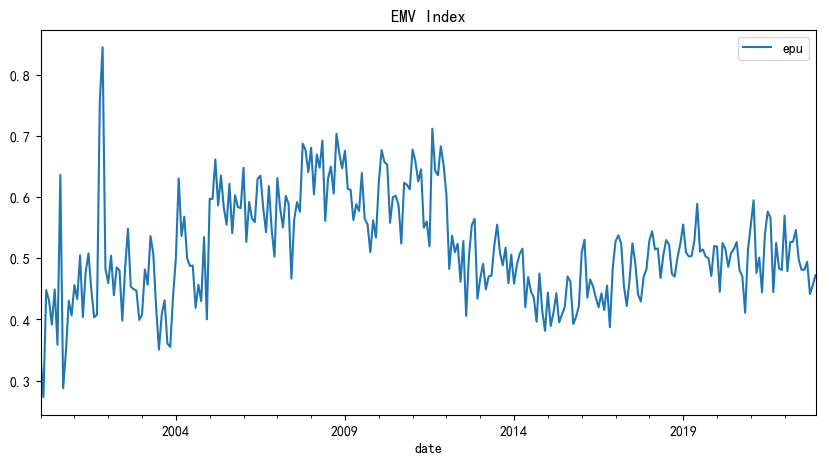

In [99]:
raw_emv_df.set_index('date').plot(figsize=(10, 5), title='EMV Index')

## CIMV回归

In [112]:
data_monthly = pd.read_csv('data_monthly_fenci_result.csv')

In [113]:
data_monthly['date'] = data_monthly['month']

In [114]:
# 训练+验证
data_train_test = data_monthly[(data_monthly['date'] >= '2015-02') & (data_monthly['date'] <= '2022-12')]

In [36]:
# 预测
data_pre = data_monthly[(data_monthly['date'] >= '2000-01') & (data_monthly['date'] <= '2015-01')]

### 向量化

In [14]:
from pandarallel import pandarallel

In [15]:
pandarallel.initialize(progress_bar= True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [37]:
# 去掉词频小于3的词语
word_counts = {}
for index, row in data_train_test.iterrows():
    words = row['text_words'].split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
filtered_words = [word for word, count in word_counts.items() if count >= 3]

# data_train_test['filtered_text_words'] = data_train_test['text_words'].parallel_apply(lambda x: ' '.join([word for word in x.split() if word in filtered_words]))

In [18]:
# data_train_test.to_csv('./data_train_test.csv', index=None)
# print('done!')
# data_train_test = pd.read_csv('./data_train_test.csv')

done!


In [38]:
# word_counts = {}
# for index, row in data_pre.iterrows():
#     words = row['text_words'].split()
#     for word in words:
#         word_counts[word] = word_counts.get(word, 0) + 1
# filtered_words = [word for word, count in word_counts.items() if count >= 3]
data_pre['filtered_text_words'] = data_pre['text_words'].parallel_apply(lambda x: ' '.join([word for word in x.split() if word in filtered_words]))

In [39]:
# data_pre.to_csv('./data_pre.csv', index=None)
# print('done!')

done!


In [23]:
# 训练+验证 向量化
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

vectorizer = CountVectorizer(min_df = 1, analyzer = 'word')
# 储存每个月的词语列表和词频向量
month_word_lists = []
month_word_vectors = []

for month, text in tqdm(zip(data_train_test['date'], data_train_test['filtered_text_words'])):
    word_vector = vectorizer.fit_transform([text])
    word_list = vectorizer.get_feature_names_out()
    normalized_word_vector = normalize(word_vector, norm='l1')

    # 将词语列表和归一化后的词频向量存储起来
    month_word_lists.append(word_list)
    month_word_vectors.append(normalized_word_vector.toarray())

# 获取所有月份的词语列表的并集
all_words = list(set().union(*month_word_lists))

# 构建独热编码向量𝑋𝑡
X = []
for word_vector, word_list in tqdm(zip(month_word_vectors, month_word_lists)):
  # 初始化独热编码向量
  one_hot_vector = [0] * len(all_words)

  # 对每个词语进行处理
  for word, frequency in zip(word_list, word_vector[0]):
    # 找到词语在所有词语列表中的位置
    index = all_words.index(word)
    # 将词频赋值到独热编码向量中对应的位置
    one_hot_vector[index] = frequency

  # 将独热编码向量添加到 X 中
  X.append(one_hot_vector)

# 将 X 转换为 DataFrame
X_df = pd.DataFrame(X, columns=all_words)

94it [00:17,  5.46it/s]
94it [1:29:09, 56.91s/it]


In [24]:
# for word_vector, word_list in tqdm(zip(month_word_vectors, month_word_lists)):
#   # 初始化独热编码向量

#     idxs = list(map(lambda x:all_words.index(x), word_list))
#     df = pd.DataFrame({'word_idx': [i for i in range(len(all_words))], 'idxs':idxs+(len(all_words)-len(idxs))*[-1], 'freq':word_vector[0].tolist()+(len(all_words)-len(idxs))*[-1]})

#     dct = {str(idx):freq for idx,freq in zip(idxs, word_vector[0])}
#     df['vect'] = df['word_idx'].parallel_apply(lambda x: dct.get(str(x), 0))
#     one_hot_vector = df['vect'].tolist()
#     # 将独热编码向量添加到 X 中
#     X.append(one_hot_vector)
# X_df.to_csv('./X_df.csv', index=None)
# print('done')

done


In [107]:
X_df.iloc[:5,-100:]

,即稳,鲍荣富,代劳,下侧,科技成就,卡斯特,刘岩,角力,全名,巴楚县,佛尔,资本形成,马赛克,国际法,同煤,百千,三十年,从今年起,王伯文,目前为止,歌手,现实感,三花,八秀村,中午,纵断面,修筑,额汇,债案,扭头,每票,客停,认准,债登,道号,地质公园,甜菜,对荐,交还,肩部,周猛,开路人,显失,阿拉伯叙利亚共和国,跳楼自杀,特将,应者,剑王,见义,澳门日报,有声有色,多罗,莫汉,吹糠见米,新春快乐,水罐,九十八,华利,季星博,邓超芝,葛国瑞时,专列,曾臻,报为,钻机,七层,已深,陈炳登,高灵敏度,耐用,卷起,不守,中国石油化工集团,贷及,新都化工,权下,作是,戒毒所,纬度,汪义,父镇,万仞,华刚林,龙王庙,绕开,可提,同业,扎紧,权二是,概念股,形形色色,求教,鸠山由纪夫,金光大道,不淡定,杠杆比率,对德,默罕,匆匆忙忙,cimv
0,0.0,0.0,8.749213,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,26.247638,0.0,0.000000,0.000000,0.0,8.749213,43.746063,0.0,17.498425,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,8.749213,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,131.238189,0.000000,0.000000,34.996850,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.903665
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,12.114678,0.0,12.114678,0.000000,0.0,0.000000,3.028669,0.0,9.086008,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.086008,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,3.028669,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.028669,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.028669,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,3.028669,0.0,0.0,0.0,0.0,0.0,3.028669,0.0,24.229355,12.114678,6.057339,3.028669,6.057339,0.0,0.0,0.0,3.028669,0.0,0.0,0.0,0.0,24.229181
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.180376,0.0,0.0,0.0,0.000000,0.0,0.000000,9.180376,0.0,4.590188,0.000000,0.0,9.180376,13.770564,0.0,0.0,0.0,0.000000,0.0,0.0,13.770564,0.0,0.0,0.0,0.0,0.000000,13.770564,0.0,0.0,0.0,0.0,4.590188,0.0,4.590188,0.0,4.590188,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.590188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.590188,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,32.131316,0.0,234.099589,0.000000,0.000000,13.770564,9.180376,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,35.541736
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.287620,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,15.862860,10.575240,0.0,0.0,0.0,5.287620,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.287620,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,5.287620,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.287620,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,26.438100,0.0,68.739061,0.000000,0.000000,15.862860,5.287620,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,39.520847
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.889108,0.0,0.0,0.0,11.778216,0.0,11.778216,0.000000,0.0,0.000000,0.000000,0.0,17.667324,0.000000,0.0,0.0,0.0,11.778216,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,5.889108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.667324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.667324,0.000000,5.889108,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,82.447513,0.000000,0.000000,29.445540,17.667324,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,44.220956


In [28]:
X_df = X_df * 1000000

In [32]:
cimv = pd.read_csv('CIMV-data.csv')
cimv['date'] = pd.to_datetime(cimv['date'])
cimv_monthly = cimv.groupby(pd.Grouper(key = 'date', freq = 'M'))['CIMV_SHSE50ETF'].mean()
cimv_monthly = cimv_monthly.reset_index()
cimv_monthly['date'] = cimv_monthly['date'].dt.strftime('%Y-%m')
cimv_monthly = cimv_monthly[['date', 'CIMV_SHSE50ETF']]
cimv_monthly = cimv_monthly[(cimv_monthly['date'] >= '2015-02') & (cimv_monthly['date'] <= '2022-12')]

In [33]:
X_df['cimv'] = cimv['CIMV_SHSE50ETF']

In [34]:
from sklearn.datasets import dump_svmlight_file
X = X_df_train.drop(columns = ['cimv'])
y = X_df_train['cimv']

dump_svmlight_file(X, y, 'TF_train_test.txt', zero_based = 0, comment = 'train+test_data')
print('done')

done


In [ ]:
print(month_word_lists[0])

In [54]:
month_word_lists = []
month_word_vectors = []

for month, text in tqdm(zip(data_pre['date'], data_pre['filtered_text_words'])):
    word_vector = vectorizer.transform([text])
    word_list = vectorizer.get_feature_names_out()
    normalized_word_vector = normalize(word_vector, norm='l1')

    # 将词语列表和归一化后的词频向量存储起来
    month_word_lists.append(word_list)
    month_word_vectors.append(normalized_word_vector.toarray())

# 获取所有月份的词语列表的并集
all_words = list(set().union(*month_word_lists))

# 构建独热编码向量𝑋𝑡
X = []
for word_vector, word_list in tqdm(zip(month_word_vectors, month_word_lists)):
    # 初始化独热编码向量
    one_hot_vector = [0] * len(all_words)

    # 对每个词语进行处理
    for word, frequency in zip(word_list, word_vector[0]):
        # 找到词语在所有词语列表中的位置
        index = all_words.index(word)
        # 将词频赋值到独热编码向量中对应的位置
        one_hot_vector[index] = frequency

    # 将独热编码向量添加到 X 中
    X.append(one_hot_vector)
    
    

#     idxs = list(map(lambda x:all_words.index(x), word_list))
#     df = pd.DataFrame({'word_idx': [i for i in range(len(all_words))], 'idxs':idxs+(len(all_words)-len(idxs))*[-1], 'freq':word_vector[0].tolist()+(len(all_words)-len(idxs))*[-1]})

#     dct = {str(idx):freq for idx,freq in zip(idxs, word_vector[0])}
#     df['vect'] = df['word_idx'].parallel_apply(lambda x: dct.get(str(x), 0))
#     df['vect'].tolist()
#     # 将独热编码向量添加到 X 中
#     X.append(one_hot_vector)

# 将 X 转换为 DataFrame
X_df_pre = pd.DataFrame(X, columns=all_words)

180it [00:06, 29.23it/s]
28it [02:41,  5.77s/it]


KeyboardInterrupt: 

In [48]:
X_df_pre = X_df_pre * 1000000

In [49]:
X_df_pre['cimv'] = 0

In [50]:
X = X_df_pre.drop(columns = ['cimv'])
y = X_df_pre['cimv']

dump_svmlight_file(X, y, 'TF_pre.txt', zero_based = 0, comment = 'pre_data')
print('done')

done


### SVR论文方法设置参数

In [17]:
X_df = pd.read_csv('X_df.csv')

KeyboardInterrupt: 

In [7]:
X_df = X_df * 1000000

In [8]:
cimv = pd.read_csv('CIMV-data.csv')
cimv['date'] = pd.to_datetime(cimv['date'])

In [443]:
cimv_monthly = cimv.groupby(pd.Grouper(key = 'date', freq = 'M'))['CIMV_SHSE50ETF'].mean()
# cimv_monthly = cimv.groupby(pd.Grouper(key = 'date', freq = 'M'))['CIMV_SHSE50ETF'].apply(lambda x: x.nlargest(len(x)-2).nsmallest(len(x)-4).mean())
# cimv_monthly = cimv.groupby(pd.Grouper(key = 'date', freq = 'M'))['CIMV_SHSE50ETF'].median()
cimv_monthly = cimv_monthly.reset_index()
cimv_monthly['date'] = cimv_monthly['date'].dt.strftime('%Y-%m')
cimv_monthly = cimv_monthly[['date', 'CIMV_SHSE50ETF']]
cimv_monthly = cimv_monthly[(cimv_monthly['date'] >= '2015-02') & (cimv_monthly['date'] <= '2022-12')]
cimv_monthly.to_csv('CIMV_monthly.csv')

In [18]:
cimv_monthly = pd.read_csv('CIMV_monthly.csv')
cimv_monthly.drop(columns=['Unnamed: 0'], inplace=True)
cimv_monthly['date'] = pd.to_datetime(cimv_monthly['date'], format='%b-%y').dt.strftime('%Y-%m')
# X_df['cimv'] = cimv_monthly['CIMV_SHSE50ETF']

In [19]:
X = X_df.drop(columns = ['cimv'])
y = X_df['cimv']

NameError: name 'X_df' is not defined

In [35]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()  
X_df_scaled = standard_scaler.fit_transform(X_df)

In [36]:
X_df_scaled = pd.DataFrame(X_df_scaled, columns = X_df.columns)

In [447]:
# 划分数据集-1
X_df_train = X_df.iloc[:-17,:]
X_df_test = X_df.iloc[-17:, :]

In [448]:
print(X_df_train.shape)
print(X_df_test.shape)

(77, 149253)
(17, 149253)


In [449]:
X_train = X_df_train.drop(columns = ['cimv'])
y_train = X_df_train['cimv']
X_test = X_df_test.drop(columns = ['cimv'])
y_test = X_df_test['cimv']

In [327]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(X_train, y_train, './svm_light_windows64/svm_light_windows64/TF_train_16-21_0408.txt', zero_based = False)
dump_svmlight_file(X_test, y_test, './svm_light_windows64/svm_light_windows64/TF_test_21-22_0408.txt', zero_based = False)

#### 确定C

In [10]:
C = max(np.abs(y.mean() + 3 * np.std(y)), np.abs(y.mean() - 3 * np.std(y)))

In [46]:
C = 3 * np.std(y_train)

In [11]:
C

42.415424286738016

#### 确定$\epsilon$

In [49]:
X = X_df_scaled.drop(columns = ['cimv'])
y = X_df_scaled['cimv']

In [15]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3)
model = regressor.fit(X, y)
y_pred = model.predict(X)

In [16]:
r2_score(y, y_pred)

0.7585106295152784

In [17]:
sigma_2 = 1.5 * mean_squared_error(y, y_pred)

In [134]:
sigma_2

17.558805777764345

In [19]:
3 * math.sqrt(sigma_2) * math.sqrt(math.log(94)/94)

2.76369602212959

### SVR结果

In [10]:
with open ('./svm_light_windows64/svm_light_windows64/TF_test_result_21-22_gridparam_0408.txt', 'r') as file: 
    y_test_pred = [line.strip() for line in file]
with open ('./svm_light_windows64/svm_light_windows64/TF_train_result_15-21.txt', 'r') as file: 
    y_train_pred = [line.strip() for line in file]

In [11]:
y_train_pred = list(map(float, y_train_pred))
y_test_pred = list(map(float, y_test_pred))

In [12]:
print(len(y_train_pred))
print(len(y_test_pred))

83
17


In [13]:
r2_score(y_train.tolist(), y_train_pred[:-6])

NameError: name 'r2_score' is not defined

In [ ]:
math.sqrt(mean_squared_error(y_test.tolist()[:12], pd.Series(y_test_pred)[:12]))

In [ ]:
r2_score(y_test.tolist()[:12], pd.Series(y_test_pred)[:12])

#### 预测

In [6]:
with open ('./svm_light_windows64/svm_light_windows64/TF_pred_result_16-21_gridparam_0408.txt', 'r') as file: 
    y_pred_1 = [line.strip() for line in file]

In [7]:
y_pred_1 = list(map(float, y_pred_1))

In [8]:
len(y_pred_1)

181

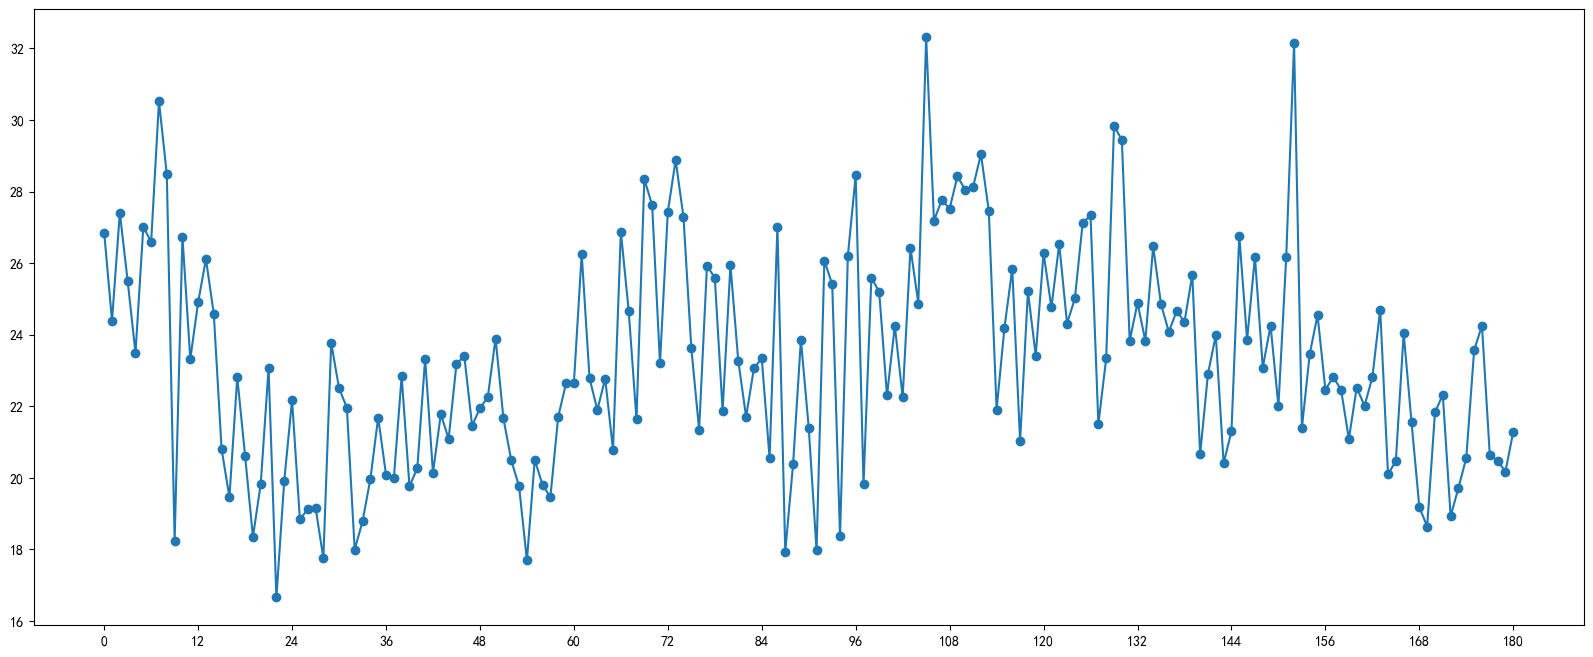

In [9]:
plt.figure(figsize=(20,8))
pd.Series(y_pred_1).plot(marker = 'o')
plt.xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180])
plt.show()

In [21]:
data_pred = {
    'date': pd.date_range(start='2000-01-01', end='2022-12-01', freq='M'),
    'cimv_pred': pd.concat([pd.Series(y_pred_1), pd.Series(y_train_pred[:-6]), pd.Series(y_test_pred)])
}
data_pred = pd.DataFrame(data_pred)

In [22]:
data_pred['date'] = data_pred['date'].dt.strftime('%Y-%m')
data_pred = pd.merge(data_pred, cimv_monthly, on='date', how='left')
data_pred.columns = ['date', 'cimv_pre', 'cimv']

In [ ]:
# data_pred.to_csv('data_cimv_all.csv')

#### 结果汇总

In [4]:
data_pred = pd.read_csv("data_cimv_all.csv")

In [5]:
data_pred.set_index('date', inplace=True)
df_1 = data_pred['2015-02':'2022-06']
df_2 = data_pred['2015-02':'2021-06']
df_3 = data_pred['2021-07':'2022-06']
df_4 = data_pred['2000-01':'2015-01']

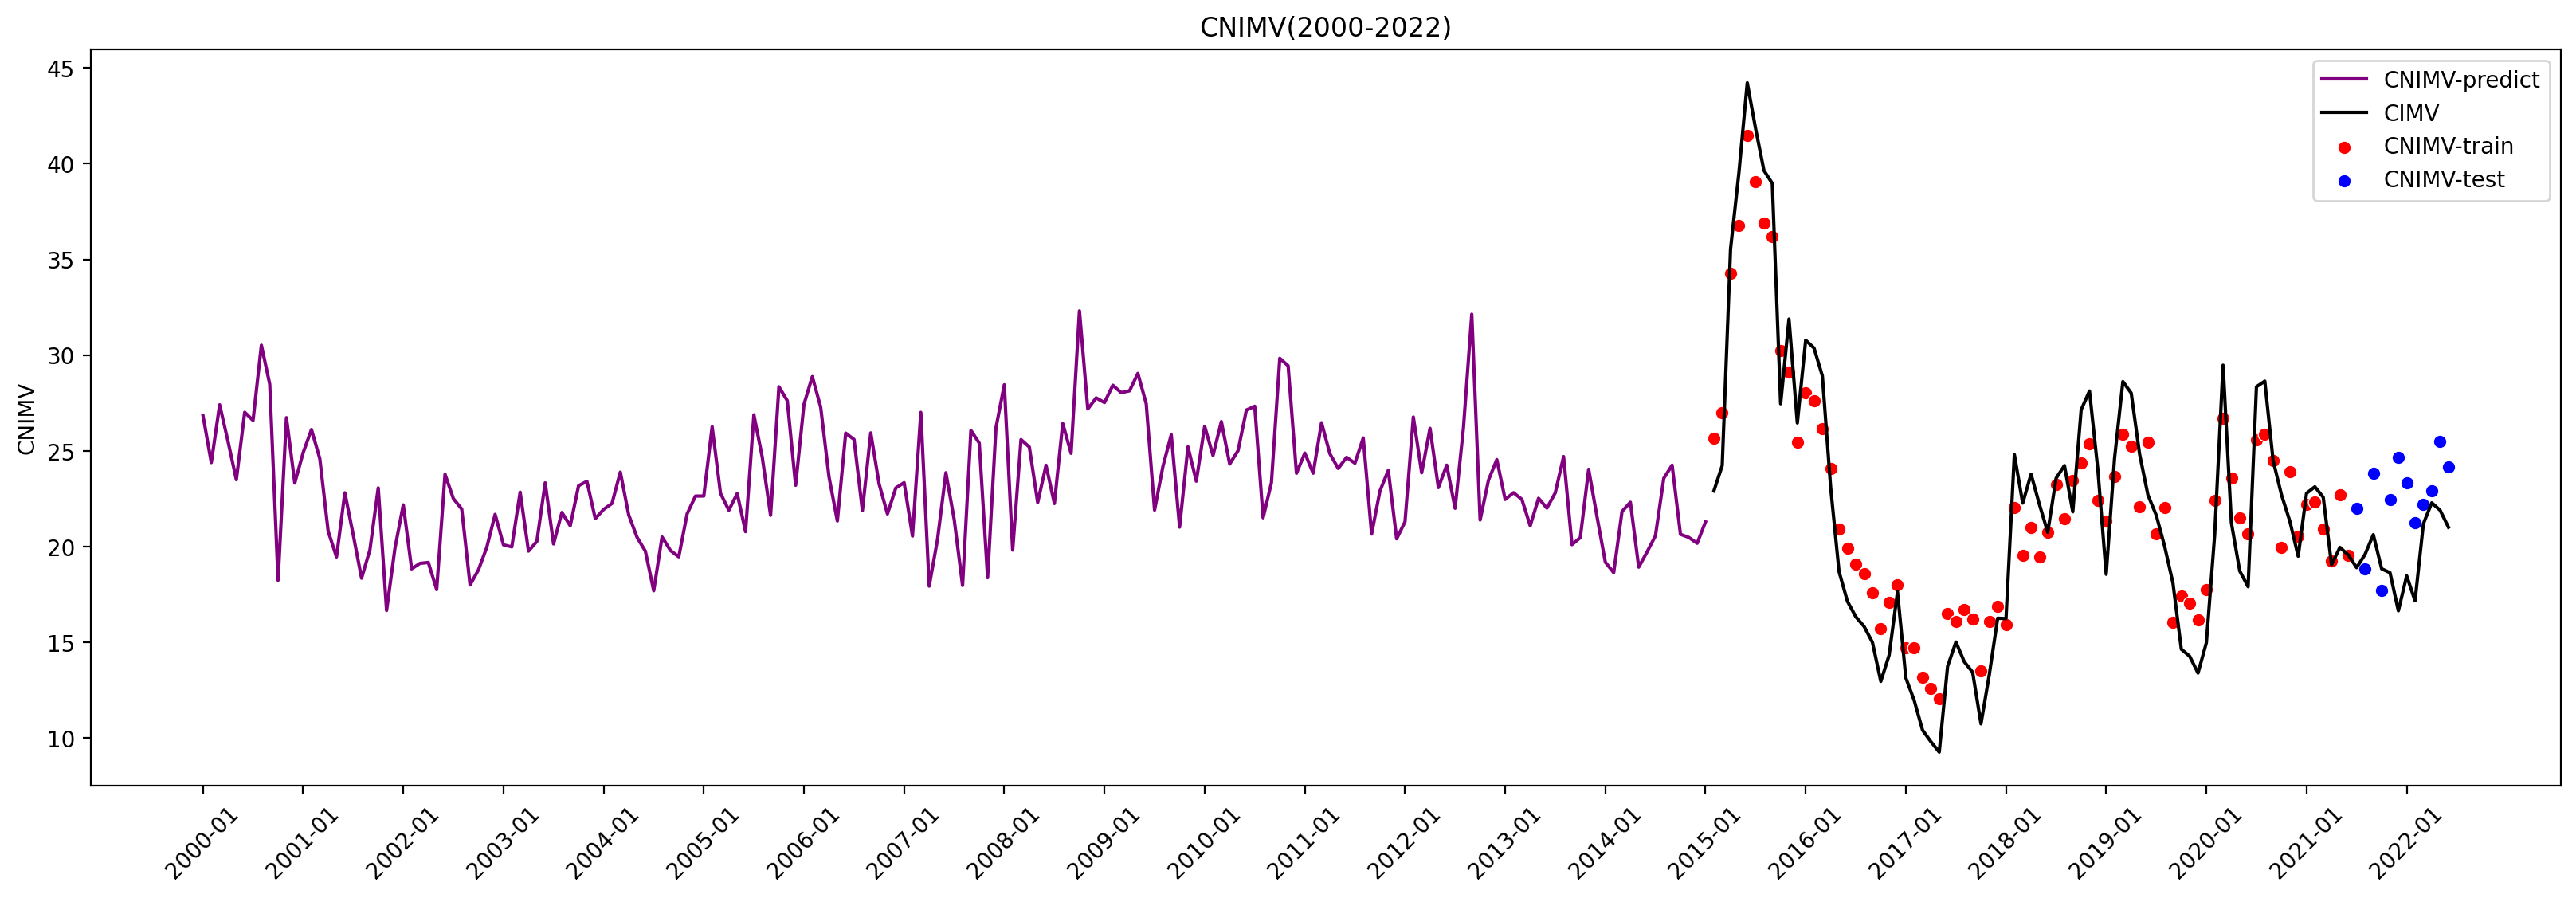

In [6]:
plt.figure(figsize=(20, 6), dpi=200)
sns.lineplot(data=df_4, x=df_4.index, y='cimv_pre', color='purple')
sns.lineplot(data=df_1, x=df_1.index, y='cimv', color='black')
sns.scatterplot(data=df_2, x=df_2.index, y='cimv_pre', color='red')
sns.scatterplot(data=df_3, x=df_3.index, y='cimv_pre', color='blue')
plt.legend(['CNIMV-predict', 'CIMV', 'CNIMV-train', 'CNIMV-test'])
plt.title('CNIMV(2000-2022)')
plt.xlabel('')
plt.ylabel('CNIMV')
plt.xticks(range(0,len(data_pred.index),12),data_pred.index[::12],rotation=45)
plt.savefig('CNIMV.png', dpi = 200)
plt.show()

#### 指数对比

In [7]:
data1 = pd.read_csv("EPU-China.csv")
data2 = pd.read_csv("EPU-China-Huang.csv")

In [8]:
data1['date'] = pd.to_datetime(data1['year'].astype(str) + '-' + data1['month'].astype(str).str.zfill(2)).dt.strftime('%Y-%m')
data2['date'] = pd.to_datetime(data2['Date'], format = '%b-%y').dt.strftime('%Y-%m')
df = pd.merge(data1, data2, on = 'date')
df['EPU'].corr(df['CNEPU'])

0.511210641972798

In [9]:
df = pd.merge(data1, data2, on = 'date')
df = pd.merge(df, data_pred, on = 'date')
df.drop(['year', 'month', 'Date', 'Unnamed: 0'], axis = 1, inplace = True)

In [10]:
df.head()

,EPU,date,CNEPU,cimv_pre,cimv
0,59.0,2000-01,38.20,26.853265,0.0
1,15.9,2000-02,40.06,24.390405,0.0
2,46.5,2000-03,48.60,27.405677,0.0
3,28.3,2000-04,64.93,25.499208,0.0
4,31.4,2000-05,49.82,23.492318,0.0


In [11]:
mean = df[['EPU', 'CNEPU', 'cimv_pre']].mean()
df_scaled = df.copy()
df_scaled[['EPU', 'CNEPU', 'cimv_pre']] = df[['EPU', 'CNEPU', 'cimv_pre']] / mean * 100

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(df_scaled['date'], df_scaled['EPU'], label = 'EPU-Baker')
plt.plot(df_scaled['date'], df_scaled['CNEPU'], label = 'EPU-Huang')
plt.plot(df_scaled['date'], df_scaled['cimv_pre'], label = 'CNIMV')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

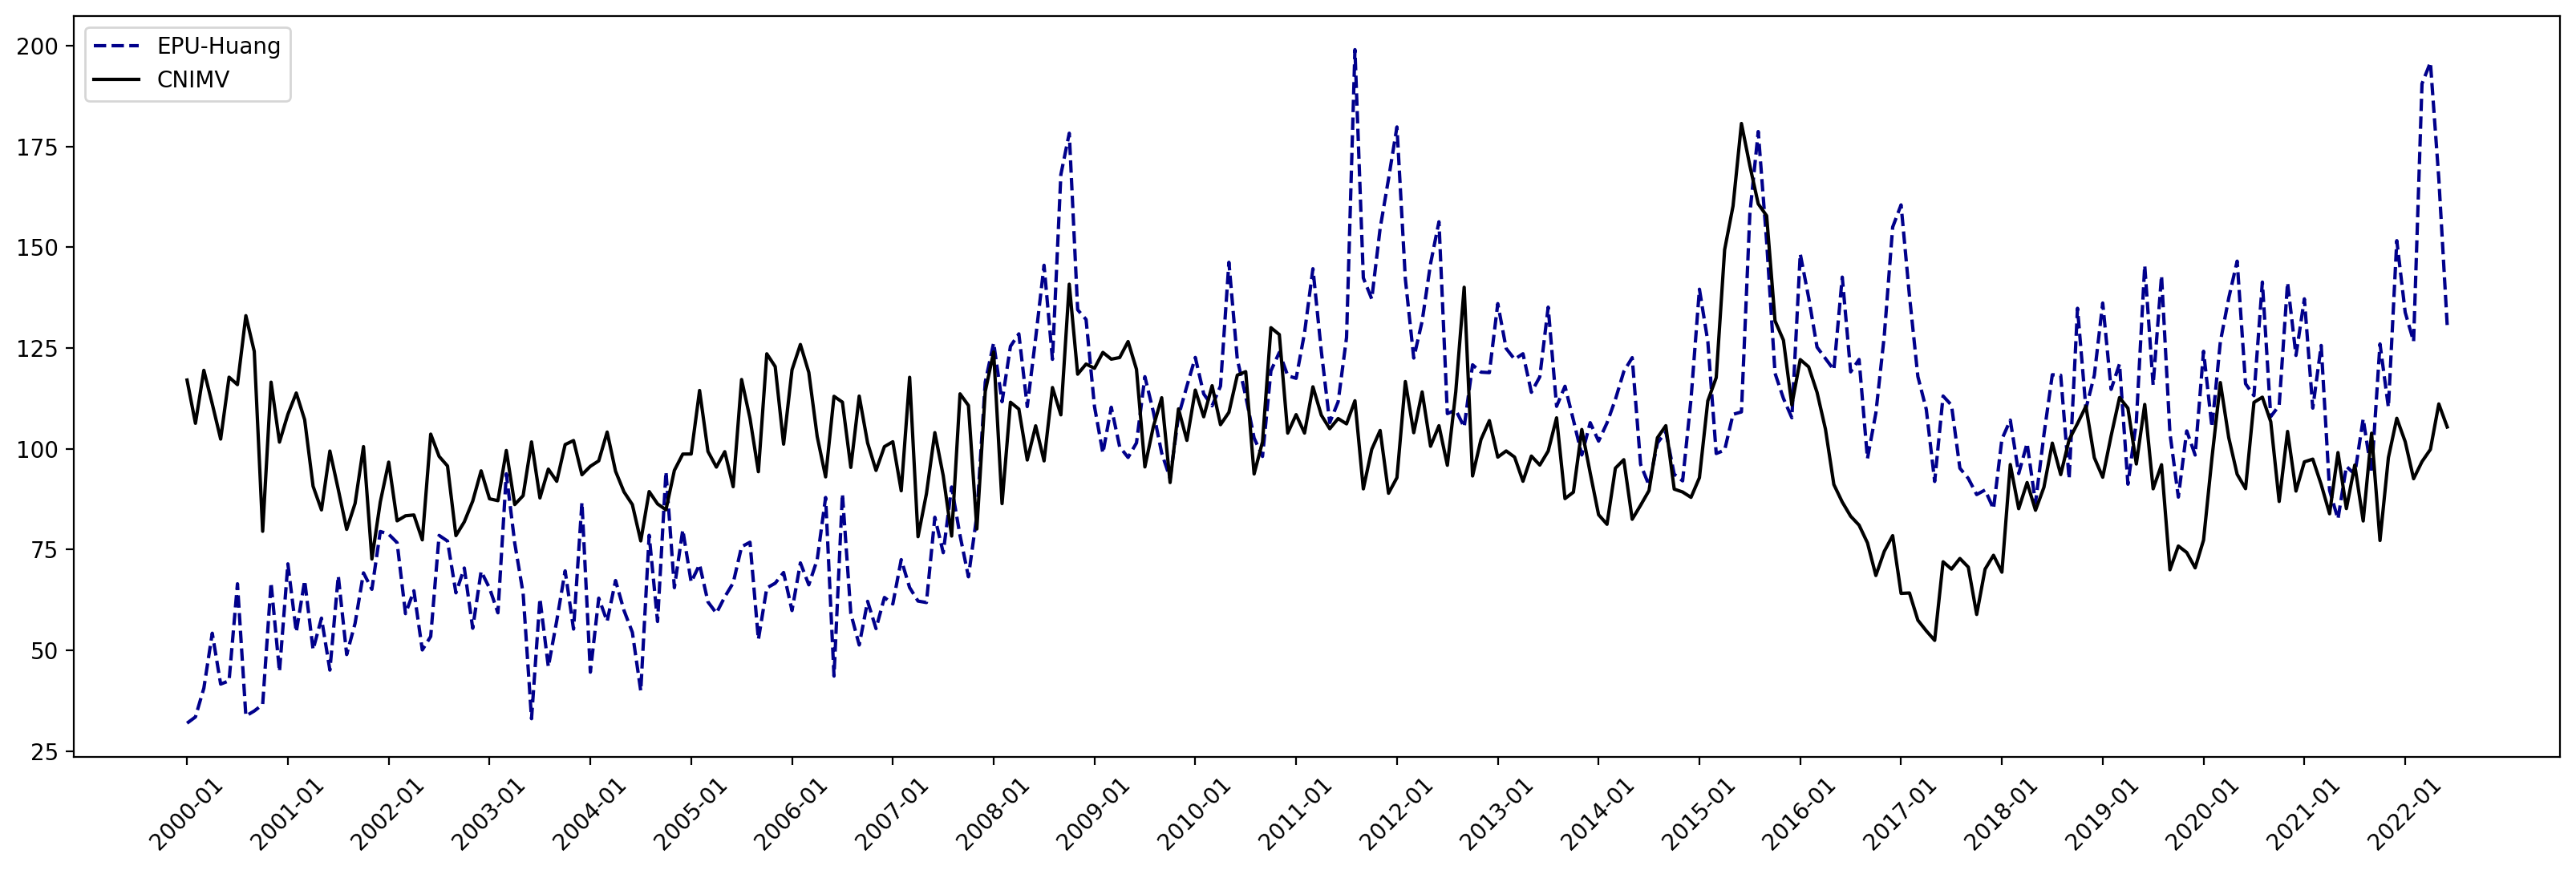

In [15]:
plt.figure(figsize = (20,6), dpi = 200)
# plt.plot(df_scaled['date'], df_scaled['EPU'], label = 'EPU-Baker')
plt.plot(df_scaled['date'], df_scaled['CNEPU'], label = 'EPU-Huang', linestyle = '--', color = 'darkblue')
plt.plot(df_scaled['date'], df_scaled['cimv_pre'], label = 'CNIMV', color = 'black')
plt.legend()
plt.xticks(range(0,len(df_scaled['date']),12), df_scaled['date'][::12], rotation=45)
plt.savefig('epu-vs-cnimv.png', dpi = 200)
plt.show()

### sklearn实现

In [10]:
X = X_df.drop(columns = ['cimv'])
y = X_df['cimv']

In [49]:
n_folds = 6
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR()  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_knn = KNeighborsRegressor(n_neighbors = 5)

In [51]:
model_names = ['ElasticNet', 'SVR', 'GBR'] 
model_dic = [model_etc, model_svr, model_gbr]
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in tqdm(model_dic):  # 读出每个回归模型对象
    print(model)
    scores = cross_val_score(model, X_train, y_train, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X_train,y_train).predict(X_train))

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

ElasticNet()


 33%|███████████████████████████▋                                                       | 1/3 [02:12<04:25, 132.99s/it]

SVR()


 67%|████████████████████████████████████████████████████████                            | 2/3 [02:41<01:11, 71.64s/it]

GradientBoostingRegressor()


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [16:59<00:00, 339.84s/it]


In [33]:
n_samples, n_features = X.shape
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
model_metrics_list = []
for i in range(3):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框

In [35]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框

samples: 94 	 features: 149252
----------------------------------------------------------------------
cross validation result:
                    0          1         2          3         4         5
ElasticNet -11.148633  -0.761382 -0.273605  -2.281347 -0.907912 -0.370540
SVR        -80.775065 -33.355540 -0.132592 -11.666035 -5.725483 -5.953842
GBR         -3.962217   0.239476  0.736191  -1.606545 -0.075390 -1.252790
----------------------------------------------------------------------
regression metrics:
                  ev       mae        mse        r2
ElasticNet  0.999996  0.014063   0.000333  0.999996
SVR         0.527884  5.318778  39.419736  0.503426
GBR         1.000000  0.001644   0.000004  1.000000


Text(0, 0.5, 'real and predicted value')

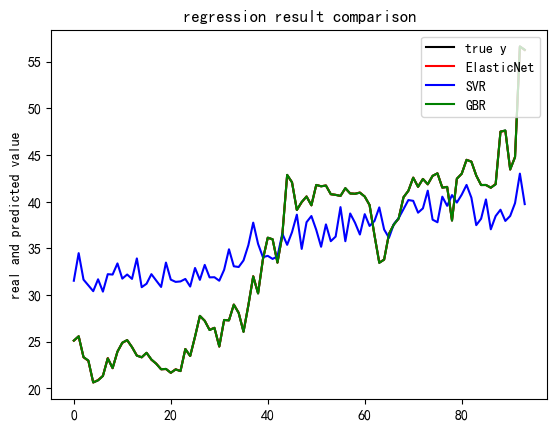

In [36]:
plt.figure()  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题

In [55]:
# 划分数据集-1
X_df_train = X_df.iloc[:-11,:]
X_df_test = X_df.iloc[-11:, :]

In [56]:
X_train = X_df_train.drop(columns = ['cimv'])
y_train = X_df_train['cimv']
X_test = X_df_test.drop(columns = ['cimv'])
y_test = X_df_test['cimv']

In [1]:
from tqdm import tqdm
tqdm.

In [11]:
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='rbf') 

param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],  # 正则化参数C
    'epsilon': [0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]  # 容错率epsilon
}

grid_search = tqdm(GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error'))
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

0it [00:00, ?it/s]

AttributeError: 'tqdm' object has no attribute 'fit'